In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('data/CSVData_ICE.csv', encoding = "ISO-8859-1")
df.head(10)
#read the dataset file into a dataframe
#display the head() of the dataframe

Keyword      tweet_id     author_id                created_at  \
0  Illegal Immigrants  1.344800e+18  1.151840e+18  2020-12-31T23:58:50.000Z   
1  Illegal Immigrants  1.344680e+18  1.028750e+18  2020-12-31T16:23:15.000Z   
2  Illegal Immigrants  1.344680e+18  1.028750e+18  2020-12-31T16:16:12.000Z   
3  Illegal Immigrants  1.344520e+18  9.799344e+07  2020-12-31T05:42:51.000Z   
4  Illegal Immigrants  1.344510e+18  1.526063e+09  2020-12-31T05:25:03.000Z   
5  Illegal Immigrants  1.344430e+18  2.885402e+07  2020-12-30T23:37:46.000Z   
6  Illegal Immigrants  1.344420e+18  2.099800e+07  2020-12-30T23:23:39.000Z   
7  Illegal Immigrants  1.344420e+18  4.013283e+07  2020-12-30T23:14:17.000Z   
8  Illegal Immigrants  1.344330e+18  4.615713e+07  2020-12-30T17:04:45.000Z   
9  Illegal Immigrants  1.341160e+18  9.399672e+07  2020-12-21T23:31:14.000Z   

           place_id                                         tweet_text  
0  01dc03847a7eed3c  You are kidding right!!! You have absolutely n...  
1  5635c19c2b5078d1  @GReschenthaler Donât vote for nothing else ...  
2  5635c19c2b5078d1  @MarkMeadows Why is the American People get th...  
3  9ffe28f9656f4f89  I will never understand when Republicans call ...  
4  c79a0302b462ea2f  @John_Muench @HawleyMO If you want to count th...  
5  01fbe706f872cb32  Border Chief: Biden Administration Would Likel...  
6  8173485c72e78ca5                               Next break - Warnock  
7  9816e8a79991d1a2  If you've been hurt by the church then I'm so ...  
8  a612c69b44b2e5da  What do you get when you have illegal immigran...  
9  9c9fa69deb120a34  The same people who complain about illegal imm...

In [4]:
print(df.shape[0])

34823


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/onercelepcikay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True


*****Year: 2010*****
Total Tweets:  313
Positive Tweets:  55  % 17.6
Negative Tweets:  172  % 55.0
Neutral Tweets:  86  % 27.5


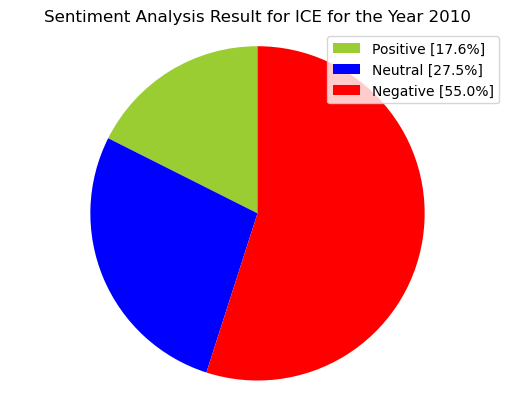


*****Year: 2011*****
Total Tweets:  675
Positive Tweets:  171  % 25.3
Negative Tweets:  259  % 38.4
Neutral Tweets:  245  % 36.3



*****Year: 2012*****
Total Tweets:  651
Positive Tweets:  138  % 21.2
Negative Tweets:  219  % 33.6
Neutral Tweets:  294  % 45.2



*****Year: 2013*****
Total Tweets:  716
Positive Tweets:  178  % 24.9
Negative Tweets:  241  % 33.7
Neutral Tweets:  297  % 41.5


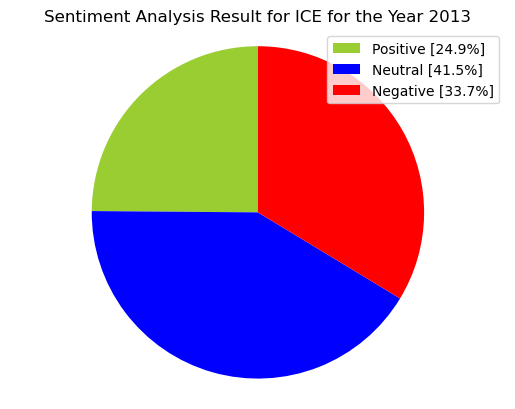


*****Year: 2014*****
Total Tweets:  680
Positive Tweets:  191  % 28.1
Negative Tweets:  230  % 33.8
Neutral Tweets:  259  % 38.1



*****Year: 2015*****
Total Tweets:  762
Positive Tweets:  206  % 27.0
Negative Tweets:  252  % 33.1
Neutral Tweets:  304  % 39.9


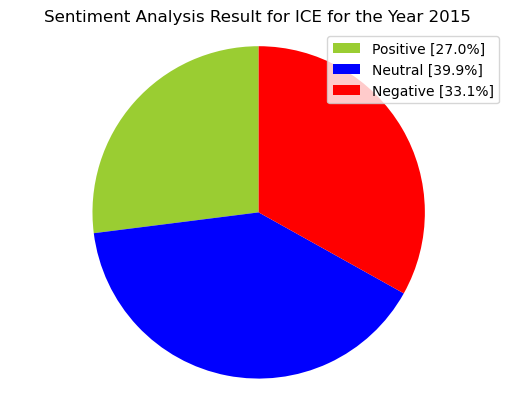


*****Year: 2016*****
Total Tweets:  907
Positive Tweets:  243  % 26.8
Negative Tweets:  317  % 35.0
Neutral Tweets:  347  % 38.3



*****Year: 2017*****
Total Tweets:  924
Positive Tweets:  259  % 28.0
Negative Tweets:  366  % 39.6
Neutral Tweets:  299  % 32.4



*****Year: 2018*****
Total Tweets:  957
Positive Tweets:  302  % 31.6
Negative Tweets:  384  % 40.1
Neutral Tweets:  271  % 28.3



*****Year: 2019*****
Total Tweets:  961
Positive Tweets:  262  % 27.3
Negative Tweets:  384  % 40.0
Neutral Tweets:  315  % 32.8


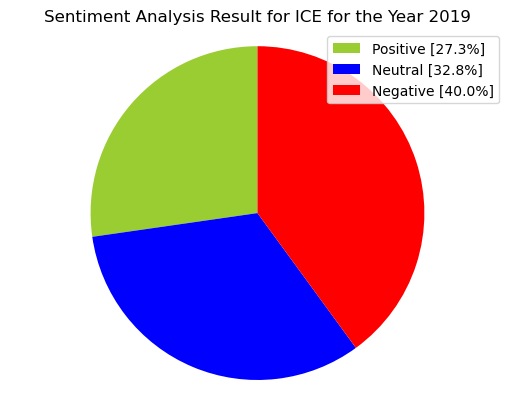


*****Year: 2020*****
Total Tweets:  831
Positive Tweets:  252  % 30.3
Negative Tweets:  299  % 36.0
Neutral Tweets:  280  % 33.7


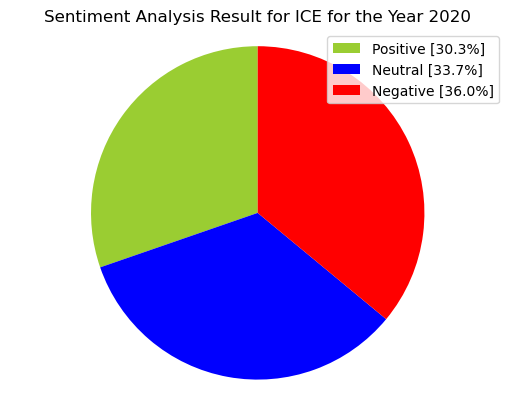

    year       pos       neg      diff
0   2010  0.175719  0.549521 -0.373802
1   2011  0.253333  0.383704 -0.130370
2   2012  0.211982  0.336406 -0.124424
3   2013  0.248603  0.336592 -0.087989
4   2014  0.280882  0.338235 -0.057353
5   2015  0.270341  0.330709 -0.060367
6   2016  0.267916  0.349504 -0.081588
7   2017  0.280303  0.396104 -0.115801
8   2018  0.315569  0.401254 -0.085684
9   2019  0.272633  0.399584 -0.126951
10  2020  0.303249  0.359807 -0.056558


In [9]:
cols = ['year','pos','neg','diff']
lst = []

for year in range (2010,2021): 
    rows=0 
    positive = 0 
    negative = 0 
    neutral = 0 
    polarity = 0 
    tweet_list = [] 
    neutral_list = [] 
    negative_list = [] 
    positive_list = [] 
    startdate = str(year)+"-1-1" 
    stopdate = str(year)+"-12-31" 
    filterdate = (df["created_at"] >= startdate ) & (df["created_at"] <= stopdate) 
    df_filtered= df.loc[filterdate] 
    size = df_filtered.shape[0]
    # print(size) 
    rows = rows+size# print(rows)# print(startdate+ " .. "+ stopdate + " --> " +str(size))

    noOfTweet = size
    df_tweets = df_filtered ['tweet_text']
    
    for tweet in df_tweets: 

        #print("Type of tweet: ", type(tweet)) 
        tweet_list.append(tweet) 
        analysis = TextBlob(tweet) 
        score = SentimentIntensityAnalyzer().polarity_scores(tweet) 
        neg = score['neg'] 
        neu = score['neu'] 
        pos = score['pos'] 
        comp = score['compound'] 
        polarity += analysis.sentiment.polarity 

        if neg > pos: 
            negative_list.append(tweet) 
            negative += 1 
        elif pos > neg: 
            positive_list.append(tweet) 
            positive += 1 
        elif pos == neg: 
            neutral_list.append(tweet) 
            neutral += 1 


    positive_per = 100 * float(positive)/float(noOfTweet)
    negative_per = 100 * float(negative)/float(noOfTweet)
    neutral_per = 100 * float(neutral)/float(noOfTweet)
    polarity_per = 100 * float(polarity)/float(noOfTweet)

    lst.append ([year, positive_per/100, negative_per/100, positive_per/100 - negative_per/100])

    
    positive_per = format(positive_per, '.1f') 
    negative_per = format(negative_per, '.1f') 
    neutral_per = format(neutral_per, '.1f')

    #Number of Tweets (Total, Positive, Negative, Neutral) 
    tweet_list = pd.DataFrame(tweet_list) 
    neutral_list = pd.DataFrame(neutral_list) 
    negative_list = pd.DataFrame(negative_list) 
    positive_list = pd.DataFrame(positive_list) 
    print("\n*****Year: "+startdate[:4]+"*****") 
    print("Total Tweets: ",len(tweet_list)) 
    print("Positive Tweets: ",len(positive_list), " %", positive_per) 
    print("Negative Tweets: ", len(negative_list), " %", negative_per) 
    print("Neutral Tweets: ",len(neutral_list), " %", neutral_per)


    #Creating PieCart 
    labels = ['Positive ['+str(positive_per)+'%]' , 'Neutral ['+str(neutral_per)+'%]', 'Negative ['+str(negative_per)+'%]'] 
    sizes = [positive_per, neutral_per, negative_per] 
    colors = ['yellowgreen', 'blue','red'] 
    patches, texts = plt.pie(sizes,colors=colors, startangle=90) 
    plt.style.use('default') 
    plt.legend(labels) 
    plt.title("Sentiment Analysis Result for ICE for the Year "+startdate[:4] ) 
    plt.axis('equal') 
    plt.show() 
              
df_summary = pd.DataFrame(lst, columns=cols)
print(df_summary)
df_summary.to_csv ('Sentiments_ICE.csv', index = False, header=True)

In [ ]:
df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

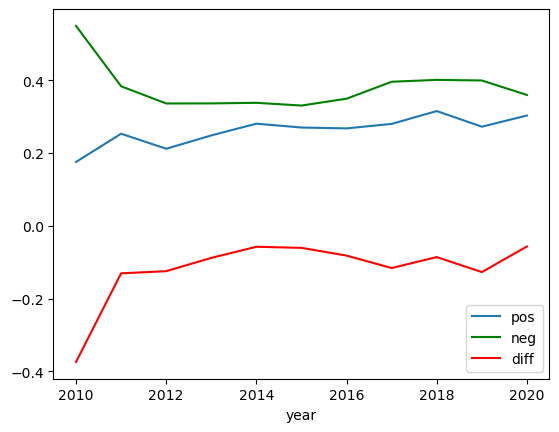

In [10]:
ax = plt.gca()

df_summary.plot(kind='line',x='year',y='pos',ax=ax)
df_summary.plot(kind='line',x='year',y='neg', color='green', ax=ax)
df_summary.plot(kind='line',x='year',y='diff', color='red', ax=ax)

plt.show()

In [81]:
df.shape[0]

pos=0.35
neg =0.17

cols = ['year','pos','neg']
lst = []

for y in range(2010,2021):
    lst.append ([y, pos, neg])

df_summary = pd.DataFrame(lst, columns=cols)
 
print(df_summary)


    year   pos   neg
0   2010  0.35  0.17
1   2011  0.35  0.17
2   2012  0.35  0.17
3   2013  0.35  0.17
4   2014  0.35  0.17
5   2015  0.35  0.17
6   2016  0.35  0.17
7   2017  0.35  0.17
8   2018  0.35  0.17
9   2019  0.35  0.17
10  2020  0.35  0.17


Year  Budget    RSV
0  2010  21.953  28.17
1  2011  20.967  30.50
2  2012  19.789  29.17
3  2013  18.511  21.25
4  2014  19.058  22.25
5  2015  19.426  26.83
6  2016  20.560  21.75
7  2017  20.348  31.25
8  2018  21.112  22.00
9  2019  21.500  22.50

In [96]:
df_summary.append(df_values)

year       pos       neg      diff    Year  Budget    RSV
0   2010.0  0.372951  0.135246  0.237705     NaN     NaN    NaN
1   2011.0  0.342803  0.110795  0.232008     NaN     NaN    NaN
2   2012.0  0.389816  0.125209  0.264608     NaN     NaN    NaN
3   2013.0  0.391416  0.122747  0.268670     NaN     NaN    NaN
4   2014.0  0.365706  0.133536  0.232170     NaN     NaN    NaN
5   2015.0  0.346095  0.117152  0.228943     NaN     NaN    NaN
6   2016.0  0.378210  0.155642  0.222568     NaN     NaN    NaN
7   2017.0  0.412097  0.132258  0.279839     NaN     NaN    NaN
8   2018.0  0.404130  0.164454  0.239676     NaN     NaN    NaN
9   2019.0  0.409231  0.128462  0.280769     NaN     NaN    NaN
10  2020.0  0.430931  0.154655  0.276276     NaN     NaN    NaN
0      NaN       NaN       NaN       NaN  2010.0  21.953  28.17
1      NaN       NaN       NaN       NaN  2011.0  20.967  30.50
2      NaN       NaN       NaN       NaN  2012.0  19.789  29.17
3      NaN       NaN       NaN       NaN  2013.0  18.511  21.25
4      NaN       NaN       NaN       NaN  2014.0  19.058  22.25
5      NaN       NaN       NaN       NaN  2015.0  19.426  26.83
6      NaN       NaN       NaN       NaN  2016.0  20.560  21.75
7      NaN       NaN       NaN       NaN  2017.0  20.348  31.25
8      NaN       NaN       NaN       NaN  2018.0  21.112  22.00
9      NaN       NaN       NaN       NaN  2019.0  21.500  22.50
10     NaN       NaN       NaN       NaN  2020.0  22.629  25.67